<a href="https://colab.research.google.com/github/vlcekpetr/project_pyladies/blob/master/CI_idokladcz_brand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# instalace potřebných knihoven na cloudu, jakmile doběhne je potřeba kliknout na tlačítko restart runtime https://prnt.sc/pvxchk, poté už tuto buňku netřeba spouštět
!pip  install numpy==1.15.4
!pip  install pandas==0.23.4
!pip  install git+https://github.com/jamalsenouci/causalimpact.git
!pip install statsmodels==0.8.0
!pip install scipy==1.2.0

In [0]:
from causalimpact import CausalImpact
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 6)

In [0]:
# tady je zdrojove csv, ktere si staci uploadovat sem https://prnt.sc/pvxdz8

data = pd.read_csv("idoklad-cz-konverze.csv").set_index("Index")


In [0]:
data.shape
data.head()

,Praha+Stredocesky+Jiho registrace,Ostatní kraje
Index,,
1,28,42
2,111,55
3,69,125
4,83,14
5,42,42


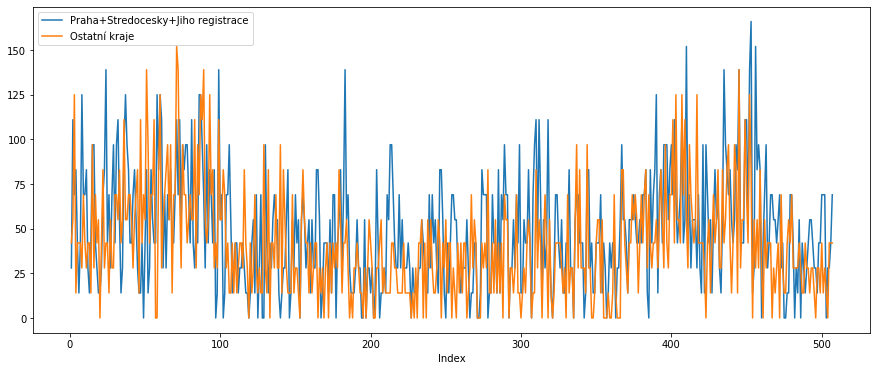

In [0]:
# zobrazí zdrojová data
 data.plot();
 #data.plot(x=data.index, y=data.columns)

In [0]:
data.describe()

,Praha+Stredocesky+Jiho registrace,Ostatní kraje
count,507.000000,507.000000
mean,49.049310,40.984221
std,32.342833,29.914102
min,0.000000,0.000000
25%,28.000000,14.000000
50%,42.000000,42.000000
75%,69.000000,55.000000
max,166.000000,152.000000


In [0]:
pre_period = [1,497]
post_period = [498,507]

impact = CausalImpact(data, pre_period, post_period)

In [0]:
impact.run()

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


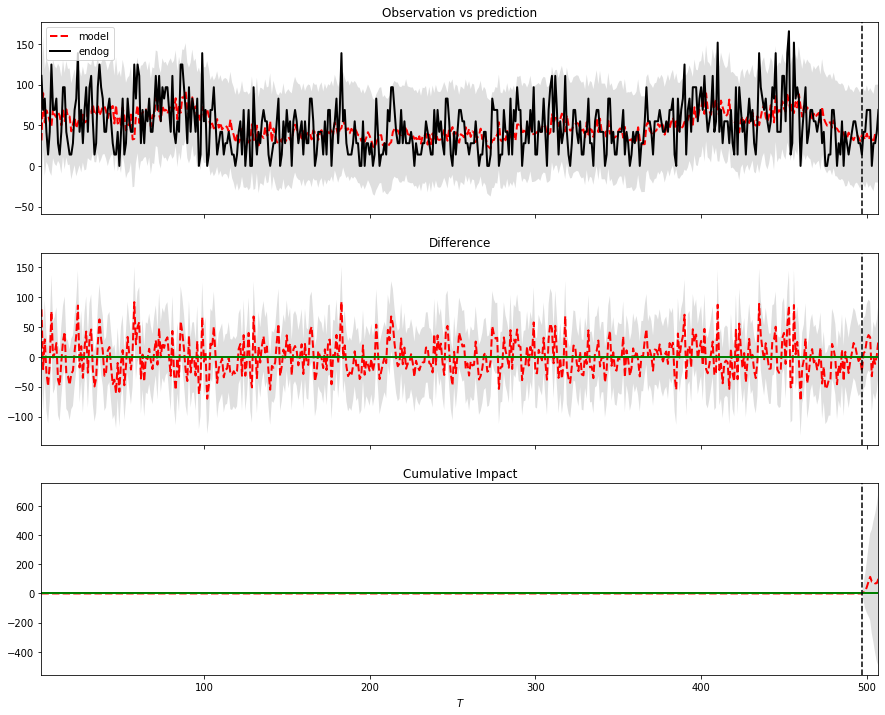

In [0]:
impact.plot()

In [0]:
impact.summary()

                           Average         Cumulative
Actual                          45                458
Predicted                       35                358
95% CI                   [-23, 95]        [-238, 955]
                                                     
Absolute Effect                  9                 99
95% CI                   [69, -49]        [696, -497]
                                                     
Relative Effect              27.9%              27.9%
95% CI           [194.6%, -138.8%]  [194.6%, -138.8%]


In [0]:
impact.summary("report")

 During the post-intervention period, the response variable had an average value of approx. 45.  By contrast, in  the
absence of an intervention, we would have expected an average response of 35. The 95% interval of this counterfactual
prediction is [-23, 95]. Subtracting this prediction from the observed response yields an estimate of the causal effect
the intervention had on the response variable. This effect is 9 with a 95% interval of [69, -49]. For a discussion of
the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 458.  By contrast, had  the intervention not taken place, we
would have expected a sum of 458. The 95% interval of this prediction is [-238, 955]


 The above results are given in terms of absolute numbers. In relative terms, the response variable showed  an increase
of  27.9%. The 95% interval of this

In [0]:
data = impact.inferences
data.to_csv("export.csv")